# **Importación de librerías** 
Se importan las librerías necesarias para el análisis
- *requests*:  para hacer solicitudes HTTP.
- *pandas*: para la manipulación de datos.
- *numpy*: para operaciones numéricas.
- *matplotlib y seaborn*: para la visualización de datos.

In [33]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from scipy import stats
from sklearn.preprocessing import StandardScaler

import data_util as util

import warnings

# Ignorar todas las advertencias
warnings.filterwarnings("ignore")

In [34]:
df.shape

(20780, 41)

# **Obtención de los datos**
* Cargar csv: Obtener los datos de la API.
* Convertir los datos cargados a un DataFrame de Python
* Analizar las características del DataFrame.

In [35]:

# Cargar csv
ruta = "../minidatathonF5_emma/data/all-states-history.csv"
ruta_nuevoCSV = "../minidatathonF5_emma/data/covid19_all.csv"
df = pd.read_csv(ruta, sep=',')
df.head(2)

,date,state,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
0,2021-03-07,AK,305.0,NaN,0,NaN,1293.0,1293.0,33.0,0,...,1731628.0,0,NaN,NaN,NaN,NaN,NaN,0,1731628.0,0
1,2021-03-07,AL,10148.0,7963.0,-1,2185.0,45976.0,45976.0,494.0,0,...,2323788.0,2347,NaN,NaN,119757.0,NaN,2323788.0,2347,NaN,0


In [36]:
# Comprobar la dimensión de los datos cargados
df.shape

(20780, 41)

In [37]:
# Identificación de los tipos datos de las columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20780 entries, 0 to 20779
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   date                              20780 non-null  object 
 1   state                             20780 non-null  object 
 2   death                             19930 non-null  float64
 3   deathConfirmed                    9422 non-null   float64
 4   deathIncrease                     20780 non-null  int64  
 5   deathProbable                     7593 non-null   float64
 6   hospitalized                      12382 non-null  float64
 7   hospitalizedCumulative            12382 non-null  float64
 8   hospitalizedCurrently             17339 non-null  float64
 9   hospitalizedIncrease              20780 non-null  int64  
 10  inIcuCumulative                   3789 non-null   float64
 11  inIcuCurrently                    11636 non-null  float64
 12  nega

## 3. Preparar datos

* Crear nuevas columnas
* Transformar columnas
* Seleccionar las columnas sobre las que realizar EDA


In [38]:
# Crear nuevas variables
df['mortality_rate'] = (df['death'] / df['positive'] * 100).round(2)
df['hospitalization_rate'] = (df['hospitalized'] / df['positive'] * 100).round(2)

In [39]:
# Convertir la fecha a formato datetime
# df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')

# Ordenar por fecha
df = df.sort_values('date')
df.head(2)

,date,state,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,...,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease,mortality_rate,hospitalization_rate
20779,2020-01-13,WA,NaN,NaN,0,NaN,NaN,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,0,NaN,NaN
20778,2020-01-14,WA,NaN,NaN,0,NaN,NaN,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,0,NaN,NaN


In [40]:
# Mostrar los valores únicos de la columna "state"
valores_unicos_state = df['state'].unique()
print(valores_unicos_state)

['WA' 'MA' 'VA' 'FL' 'NJ' 'NE' 'IN' 'CT' 'MI' 'RI' 'WY' 'NY' 'TX' 'VT'
 'WI' 'PA' 'IL' 'HI' 'CO' 'NC' 'CA' 'AZ' 'GA' 'NH' 'SC' 'OR' 'MD' 'DC'
 'OH' 'TN' 'NV' 'NM' 'KY' 'IA' 'DE' 'AR' 'AK' 'MN' 'KS' 'WV' 'ME' 'ID'
 'LA' 'AL' 'MO' 'MT' 'UT' 'SD' 'MS' 'ND' 'OK' 'GU' 'AS' 'MP' 'VI' 'PR']


In [41]:
# Explorar columnas del dataset, para crear,transformar y eliminar las que sean necesarias para el análisis
df.columns

Index(['date', 'state', 'death', 'deathConfirmed', 'deathIncrease',
       'deathProbable', 'hospitalized', 'hospitalizedCumulative',
       'hospitalizedCurrently', 'hospitalizedIncrease', 'inIcuCumulative',
       'inIcuCurrently', 'negative', 'negativeIncrease',
       'negativeTestsAntibody', 'negativeTestsPeopleAntibody',
       'negativeTestsViral', 'onVentilatorCumulative', 'onVentilatorCurrently',
       'positive', 'positiveCasesViral', 'positiveIncrease', 'positiveScore',
       'positiveTestsAntibody', 'positiveTestsAntigen',
       'positiveTestsPeopleAntibody', 'positiveTestsPeopleAntigen',
       'positiveTestsViral', 'recovered', 'totalTestEncountersViral',
       'totalTestEncountersViralIncrease', 'totalTestResults',
       'totalTestResultsIncrease', 'totalTestsAntibody', 'totalTestsAntigen',
       'totalTestsPeopleAntibody', 'totalTestsPeopleAntigen',
       'totalTestsPeopleViral', 'totalTestsPeopleViralIncrease',
       'totalTestsViral', 'totalTestsViralIncrease'

In [42]:
# Se seleccionan las columnas que interesan para las estadísticas
df_hist = df[['date', 'state', 'positive', 'negative', 'hospitalized', 'death', 'totalTestResults', 'mortality_rate','hospitalization_rate' ]]
df_hist.head(5)

,date,state,positive,negative,hospitalized,death,totalTestResults,mortality_rate,hospitalization_rate
20779,2020-01-13,WA,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20778,2020-01-14,WA,0.0,NaN,NaN,NaN,NaN,NaN,NaN
20777,2020-01-15,WA,0.0,NaN,NaN,NaN,NaN,NaN,NaN
20776,2020-01-16,WA,0.0,NaN,NaN,NaN,NaN,NaN,NaN
20775,2020-01-17,WA,0.0,NaN,NaN,NaN,NaN,NaN,NaN


2. ***Conversión de Formatos***

Aseguramos que las columnas están en los formatos de datos adecuados.

In [43]:
# Información general del DataFrame para asegurar que el tipo de datos es correcto para las estadísticas
df_hist.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20780 entries, 20779 to 0
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  20780 non-null  object 
 1   state                 20780 non-null  object 
 2   positive              20592 non-null  float64
 3   negative              13290 non-null  float64
 4   hospitalized          12382 non-null  float64
 5   death                 19930 non-null  float64
 6   totalTestResults      20614 non-null  float64
 7   mortality_rate        19524 non-null  float64
 8   hospitalization_rate  12374 non-null  float64
dtypes: float64(7), object(2)
memory usage: 1.6+ MB


3. ***Exploración Inicial***

Realizaremos una exploración inicial de los datos para entender la estructura y posibles valores faltantes.

In [44]:
# Verificar valores nulos
df_hist.isnull().sum()

date                       0
state                      0
positive                 188
negative                7490
hospitalized            8398
death                    850
totalTestResults         166
mortality_rate          1256
hospitalization_rate    8406
dtype: int64

In [45]:
# Porcentaje de datos faltantes
util.calc_missing(df_hist)

positive 188 / 20780= 0.90 %
negative 7490 / 20780= 36.04 %
hospitalized 8398 / 20780= 40.41 %
death 850 / 20780= 4.09 %
totalTestResults 166 / 20780= 0.80 %
mortality_rate 1256 / 20780= 6.04 %
hospitalization_rate 8406 / 20780= 40.45 %


4. ***Tratamiento de Valores Faltantes***

Es importante manejar los valores faltantes de acuerdo a la naturaleza de los datos.

In [46]:
# Estadísticas descriptivas
df_hist.describe().round(1)

,positive,negative,hospitalized,death,totalTestResults,mortality_rate,hospitalization_rate
count,20592.0,13290.0,12382.0,19930.0,20614.0,19524.0,12374.0
mean,165156.0,848224.6,9262.8,3682.2,2186935.8,2.8,9.2
std,326785.2,1344501.4,12620.5,6281.4,4436508.2,2.0,9.1
min,0.0,0.0,1.0,0.0,0.0,0.0,1.4
25%,5753.8,53941.2,985.2,161.2,104049.8,1.4,5.3
50%,46064.5,305972.0,4472.0,1108.0,655267.0,2.0,7.5
75%,177958.0,1056611.2,12248.5,4387.5,2264766.5,3.5,11.1
max,3501394.0,10186941.0,82237.0,54124.0,49646014.0,50.0,300.0


<Axes: >

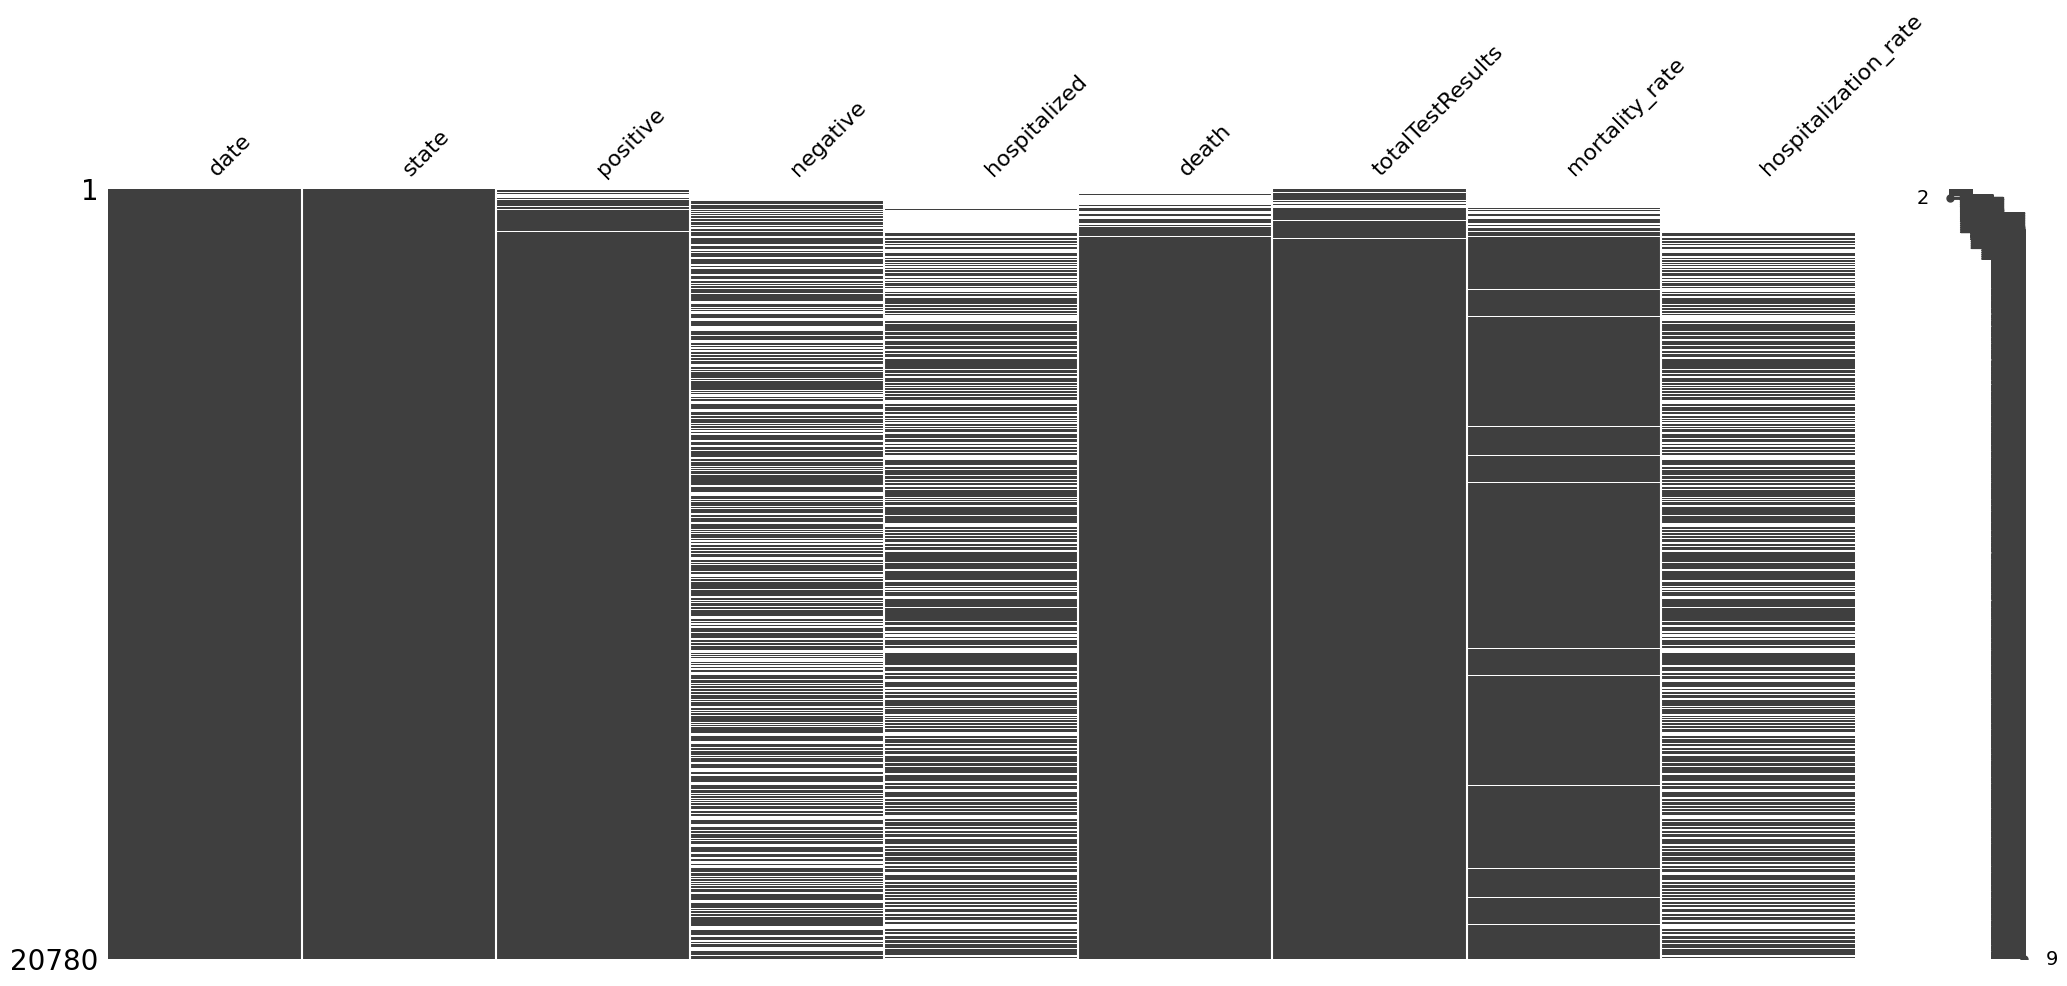

In [47]:
%matplotlib inline
msno.matrix(df_hist)

#####  Rellenar las columnas que contienen valore nulos.

* Imputar valores faltantes en columnas numéricas con la media

In [48]:
# Filtrar solo las columnas numéricas
numeric_columns = df_hist.select_dtypes(include=['number']).columns

# Imputar valores faltantes en columnas numéricas con la media
df_hist[numeric_columns] = df_hist[numeric_columns].fillna(df_hist[numeric_columns].mean())

df_hist.tail(2)


,date,state,positive,negative,hospitalized,death,totalTestResults,mortality_rate,hospitalization_rate
28,2021-03-07,MS,297581.0,1.459374e+06,9162.0,6808.0,1756955.0,2.29,3.08
0,2021-03-07,AK,56886.0,8.482246e+05,1293.0,305.0,1731628.0,0.54,2.27


Verificar si todavia hay valores nulos para las columnas selecionadas

In [49]:
df_hist.isnull().sum()

date                    0
state                   0
positive                0
negative                0
hospitalized            0
death                   0
totalTestResults        0
mortality_rate          0
hospitalization_rate    0
dtype: int64

5. ***Tratamiento de outliers***

Empezamos por analizar si hay valores atípico en nuestro conjunto de datos y luego identificamos por medio de las gráficas de bigotes (BoxPlot), cuáles son los valores que están fuera del Rango Intercuartil".

In [50]:
# funcion que dado un determinado dataframe genera una tabla con los valores de parámetros de Cuartiles que vamos aplicar en el
# tramamiento de Outiers.
def calcular_estadisticas(df_hist):
    # Crear un nuevo DataFrame para almacenar los resultados de los cuartiles
    resultados_df = pd.DataFrame(
        columns=[
            "Columna",
            "Cuartil 0.25",
            "Cuartil 0.50",
            "Cuartil 0.75",
            "Rango intercuartil",
        ]
    )

    # Crea una lista con las variables que queremos verificar los cuartiles
    numeric_columns = [
        "positive",
        "negative",
        "hospitalized",
        "death",
        "totalTestResults",
        "mortality_rate",
        "hospitalization_rate",
    ]


    # Calcular los cuartiles y los rangos intercuartiles para cada columna
    for columna in numeric_columns:
        Q1 = df_hist[columna].quantile(0.25)
        Q2 = df_hist[columna].quantile(0.50)
        Q3 = df_hist[columna].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR

        new_row = pd.DataFrame(
            {
                "Columna": columna,
                "Cuartil 0.25": Q1,
                "Cuartil 0.50": Q2,
                "Cuartil 0.75": Q3,
                "Rango intercuartil": IQR,
                "Limite inferior": limite_inferior,
                "Limite superior": limite_superior,
            },
            index=[0],
        )

        resultados_df = pd.concat([resultados_df, new_row], ignore_index=True)

    # retorna un nuevo DataFrame (resultados_df) con los resultados
    return resultados_df.head(15).round(2)

In [51]:
%%time 
# LLama la función para conocernos los valores de los parámetros del procesos de los cuartiles que iremos aplicar a 
# nuestro conjunto de datos. Esta tabla tambien sirve para la documentación del proyecto.
calcular_estadisticas(df_hist)

CPU times: total: 0 ns
Wall time: 15.7 ms


,Columna,Cuartil 0.25,Cuartil 0.50,Cuartil 0.75,Rango intercuartil,Limite inferior,Limite superior
0,positive,5905.75,47410.00,175614.00,169708.25,-248656.62,430176.38
1,negative,178087.75,848224.62,848224.62,670136.87,-827117.56,1853429.93
2,hospitalized,2927.50,9262.76,9262.76,6335.26,-6575.39,18765.66
3,death,183.00,1260.50,4159.00,3976.00,-5781.00,10123.00
4,totalTestResults,106460.25,670234.50,2243481.25,2137021.00,-3099071.25,5449012.75
5,mortality_rate,1.48,2.18,3.39,1.91,-1.39,6.26
6,hospitalization_rate,6.68,9.16,9.16,2.48,2.95,12.89


### Gráficas (Situación Actual)

Diagrama de Caja y Bigotes (BoxPlot)

In [52]:
# Genera la gráfica de Bigote con todas las variables juntas
def generar_grafica_boxplot(dataframe):
    # Definir el tamaño de la figura
    plt.figure(figsize=(12, 8))  # ancho/alto

    # Configuración del layout de la gráfica
    plt.grid(True)  # Mostrar cuadrícula
    plt.xticks(rotation=45)  # Rotar etiquetas del eje x
    # plt.yticks(rotation=45)   # Rotar etiquetas del eje y
    plt.yticks(range(0, 301, 30))  # Rango de valores en el eje y
    plt.rcParams.update({"font.size": 10})  # Cambiar tamaño de la fuente

    # Código para generar la gráfica
    boxplot = dataframe.boxplot(
        column=[
        "positive",
        "negative",
        "hospitalized",
        "death",
        "totalTestResults",
        "mortality_rate",
        "hospitalization_rate",
        ],
        return_type="axes",
        showmeans=True
    )
    return boxplot

CPU times: total: 0 ns
Wall time: 92.9 ms


matplotlib.axes._axes.Axes

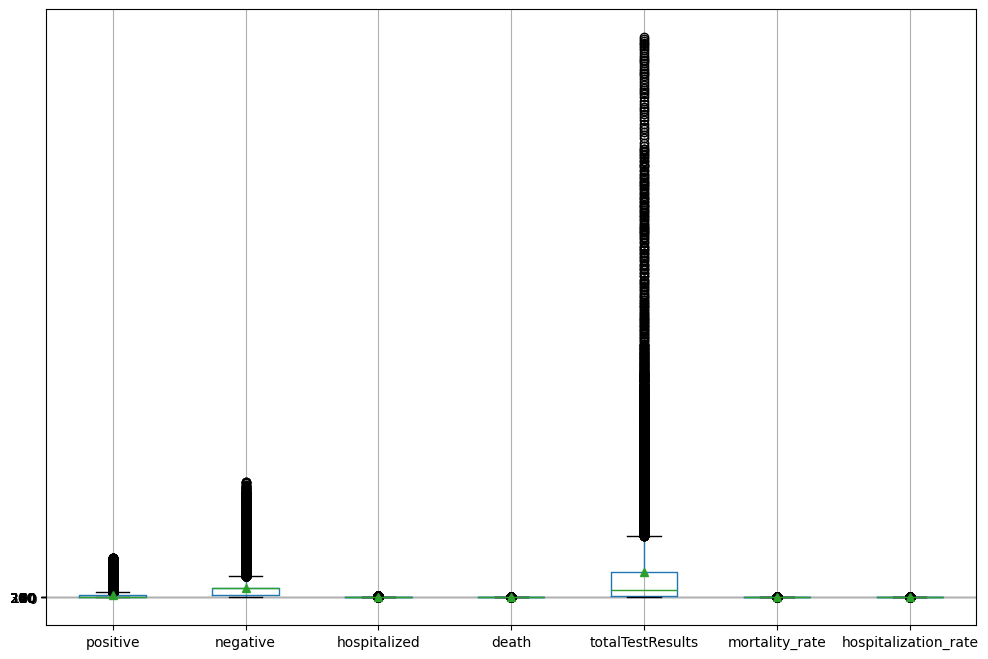

In [53]:
%%time 
# Llamada a la función
grafica = generar_grafica_boxplot(df_hist)
type(grafica)

Proceso de limpieza de outliers

In [54]:
# Define una función llamada "outliers" que devuelve una lista de valores atípicos basados em el IQR
# IQR = Q3 - Q1
# +/- 1.5*IQR

def outliers(df_hist, ft):
    Q1 = df_hist[ft].quantile(0.25)
    Q3 = df_hist[ft].quantile(0.75)
    IQR = Q3 - Q1

    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    ls = df_hist.index[(df_hist[ft] < limite_inferior) | (df_hist[ft] > limite_superior)]

    return ls

In [55]:
%%time 
# Busca y recopila los índices de los valores atípicos (outliers) en las columnas especificadas del conjunto de datos "data"

# crea una lista vacía para almacenar los índices
index_list = []
for column in [
        "positive",
        "negative",
        "hospitalized",
        "death",
        "totalTestResults",
        "mortality_rate",
        "hospitalization_rate",
]:
        index_list.extend(outliers(df_hist, column))

CPU times: total: 0 ns
Wall time: 11.5 ms


In [56]:
# Define una función que devuelve un dataframe (marco de datos) limpio, sin valores atípicos
def eliminar(df_hist, columna):
    columna = sorted(set(columna))
    df_hist = df_hist.drop(columna)
    return df_hist

In [57]:
%%time 
data_limpio = eliminar(df_hist, index_list)
data_limpio.head(2)

CPU times: total: 15.6 ms
Wall time: 3 ms


,date,state,positive,negative,hospitalized,death,totalTestResults,mortality_rate,hospitalization_rate
20779,2020-01-13,WA,165155.96926,848224.622047,9262.762478,3682.216859,2.186936e+06,2.763952,9.164449
20778,2020-01-14,WA,0.00000,848224.622047,9262.762478,3682.216859,2.186936e+06,2.763952,9.164449


In [58]:
data_limpio.shape

(13658, 9)

CPU times: total: 0 ns
Wall time: 66.7 ms


matplotlib.axes._axes.Axes

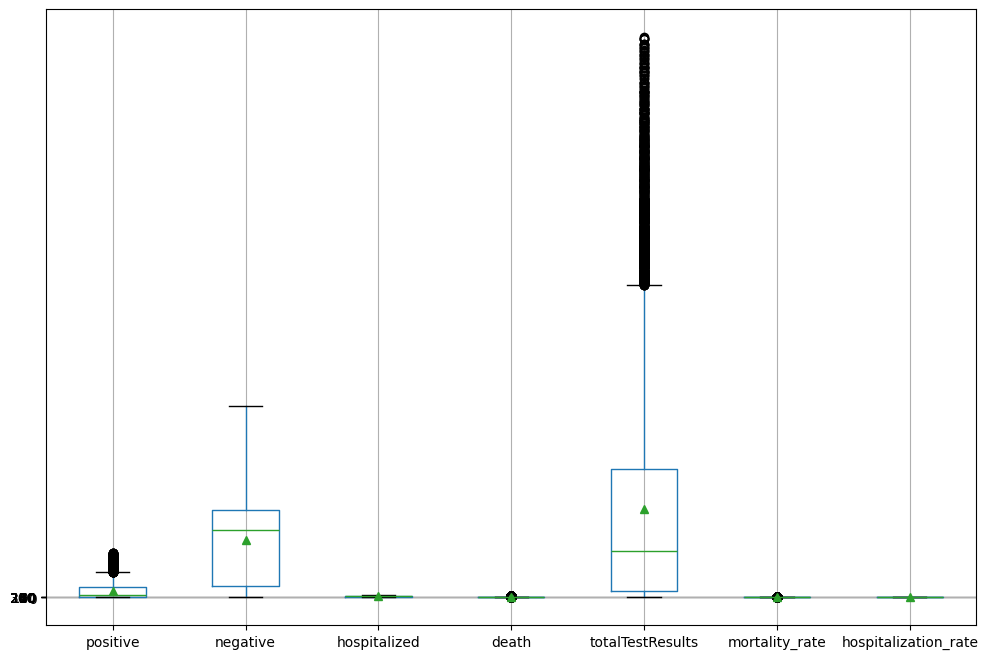

In [59]:
%%time 
# Llamada a la función
grafica = generar_grafica_boxplot(data_limpio)
type(grafica)

In [60]:
# Guardar csv
data_limpio.to_csv(ruta_nuevoCSV, index=False)